In [41]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# for better plots
sns.set(style="whitegrid")

In [42]:
# Step 2: Load and Explore the Dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# View first few rows
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
# Step 3: Check Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
print("Unique Species:", df['species'].unique())

Unique Species: ['setosa' 'versicolor' 'virginica']


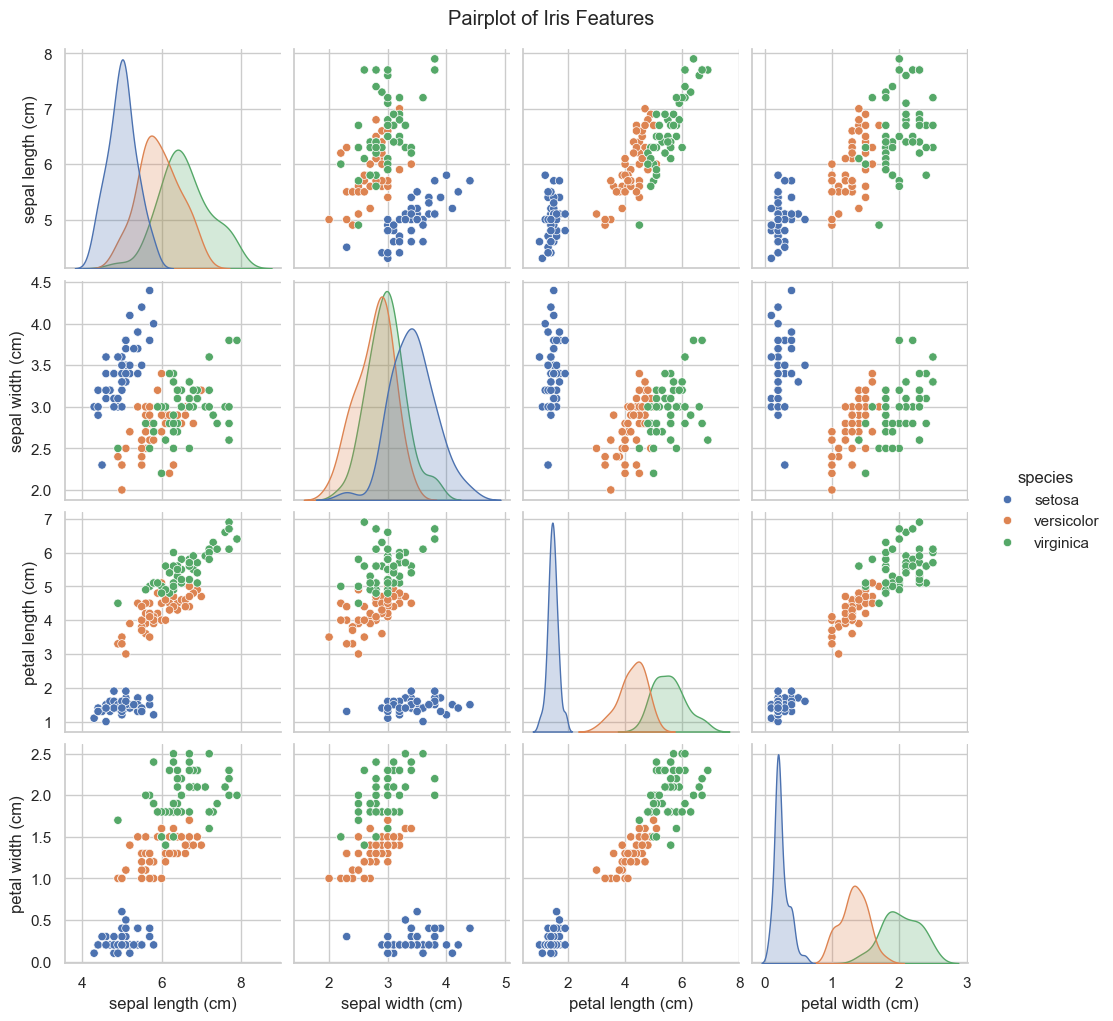

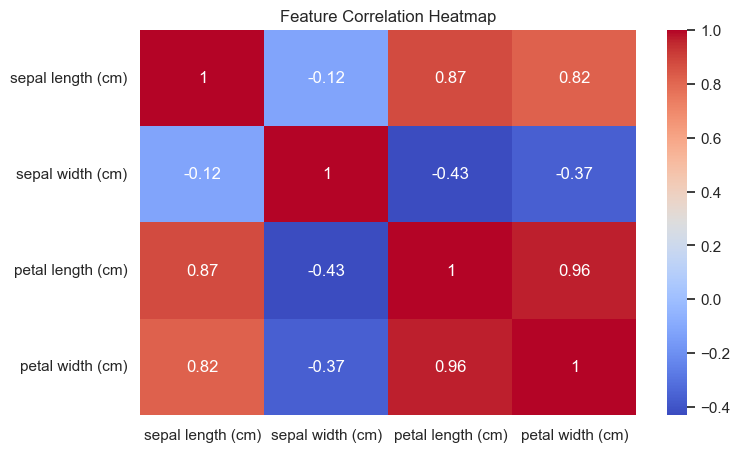

In [47]:
# Step 4: Visualize Feature Relationships
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [49]:
# Step 5: Prepare Features and Target
X = df.drop('species', axis=1)
y = df['species']
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [51]:
# Split the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 120
Testing Samples: 30


In [52]:
# Step 6: Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575],
       [ 0.54731923, -1.22765467,  0.69841284,  0.91510102],
       [-0.2885865 , -0.77987789,  0.24416059,  0.12508575],
       [ 0.54731923, -0.5559895 ,  0.75519438,  0.38842418],
       [ 2.21913069, -0.10821272,  1.3230097 ,  1.44177787],
       [ 2.21913069,  1.6828944 ,  1.66369889,  1.31010866],
       [ 2.09971558, -0.10821272,  1.60691736,  1.17843945],
       [ 0.18907392, -0.33210111,  0.41450518,  0.38842418],
       [-1.00507713, -2.34709662, -0.15331014, -0.26992188],
       [-0.04975629, -0.77987789,  0.18737906, -0.26992188],
       [-0.04975629, -1.00376628,  0.13059752, -0.00658346],
       [-1.36332244,  0.33956406, -1.23215924, -1.32327558],
       [-0.88566202,  1.

In [53]:
X_test

array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
       [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
       [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
       [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
       [-1.72156775,  0.33956406, -1.40250384, -1.32327558],
       [ 0.54731923,  0.56345245,  0.52806825,  0.52009339],
       [-1.48273754,  1.23511762, -1.57284844, -1.32327558],
       [-0.52741671,  0.78734084, -1.17537771, -1.32327558],
       [ 0.78614944, -0.10821272,  0.81197591,  1.04677024],
       [-0.52741671, -0.10821272,  0.41450518,  0.38842418],
       [ 1.74147027, -0.33210111,  1.43657276,  0.78343181],
       [ 1.26380985,  0.11567567,  0.75519438,  1.44177787],
       [ 0.78614944, -0.10821272,  1.1526651 ,  1.31010866],
       [ 0.66673433,  0.33956406,  0.41450518,  0.38842418],
       [-1.00507713,  0.78734084, -1.28894078, -1.32327558],
       [-1.00507713,  0.56345245, -1.34572231, -1.32327558],
       [-0.04975629,  2.

In [54]:
# Step 7: Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [55]:
y_pred = model.predict(X_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
      dtype=object)

✅ Logistic Regression Accuracy: 0.9333333333333333

📋 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



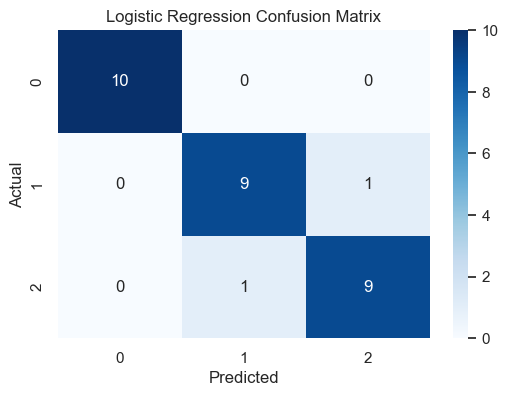

In [57]:
# Step 8: Evaluate Logistic Regression
print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [58]:
# Step 9: Train SVM Model
svm_model = SVC(kernel='linear')  # Try 'rbf' or 'poly' too
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

✅ SVM Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



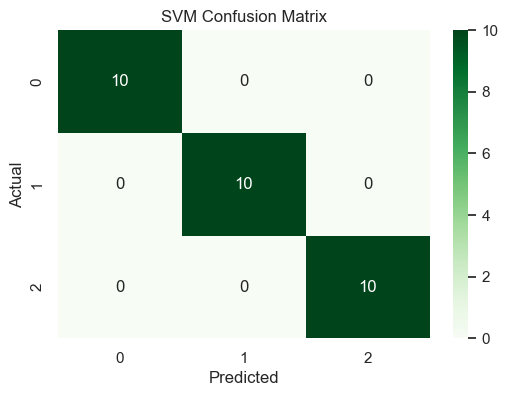

In [59]:
# Step 10: Evaluate SVM Model
y_pred_svm = svm_model.predict(X_test)

print("✅ SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
# Step 11: Compare Logistic vs SVM
acc_log = accuracy_score(y_test, y_pred)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("📊 Model Comparison:")
print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"SVM Accuracy: {acc_svm:.3f}")

if acc_svm > acc_log:
    print("✅ SVM performed slightly better!")
elif acc_log > acc_svm:
    print("✅ Logistic Regression performed slightly better!")
else:
    print("⚖️ Both models performed equally well!")


📊 Model Comparison:
Logistic Regression Accuracy: 0.933
SVM Accuracy: 1.000
✅ SVM performed slightly better!
